# DATA SET UP AND PREPROCESSING

## SET UP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import layers

In [3]:
def ts_plot(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Date")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [4]:
def eval_pred(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))

    mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred))
    rmse = tf.sqrt(mse)

    mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))

    naive_forecast_errors = tf.abs(y_true[1:] - y_true[:-1])
    mase = mae / tf.reduce_mean(naive_forecast_errors)

    return {"mae": mae.numpy(), "mse": mse.numpy(), "rmse": rmse.numpy(),
            "mape": mape.numpy(), "mase": mase.numpy()}

## DATA PREPROCESSING

In [6]:
raw_data = pd.read_csv('/content/ZHVI.csv')
raw_data.head()

,Unnamed: 0,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
0,2000-01-01,124371.614130,194462.552900,107057.833479,152120.944588,168534.319204,112076.354992,116176.374391,195547.631623,135107.474369,...,84394.192674,96502.722735,89330.636352,148751.162949,NaN,81727.793253,107546.972640,115280.517090,90661.081826,105405.254590
1,2000-02-01,124693.442114,195116.199583,107289.730712,152662.644581,168988.628589,112137.260178,116240.361564,196200.500116,135352.193725,...,84437.764981,96615.831362,89348.172125,148982.585620,NaN,81761.506175,107318.470853,115464.797762,90834.330897,105469.666762
2,2000-03-01,125034.655325,195998.782666,107570.836383,153184.118182,169422.119780,112166.800147,116474.623012,196977.310600,135667.152030,...,84517.043011,96785.173336,89451.483005,149270.727677,NaN,81918.652906,106998.699510,115635.592052,90997.885282,105567.351236
3,2000-04-01,125679.434810,197914.607377,108142.251910,154305.666135,170382.533354,112313.409636,116941.270896,198507.299696,136310.278738,...,84714.056168,97172.251080,89605.925580,149929.702032,NaN,82204.808865,106567.682035,115900.716616,91351.158279,105854.597144
4,2000-05-01,126301.898777,200141.465003,108758.461980,155466.067349,171361.599479,112408.356239,117629.440332,200163.437543,137039.271958,...,84975.892121,97672.243340,89838.733934,150681.291613,NaN,82589.160818,106388.366170,116035.163796,91741.470391,106292.575723


In [7]:
raw_data.isnull().sum()

Unnamed: 0                    0
Virginia                      0
California                    0
Florida                       0
New York                      0
New Jersey                    0
Texas                         0
Michigan                      0
Massachusetts                 0
Arizona                       1
Washington                    0
Colorado                      0
Illinois                      0
the District of Columbia      0
Nevada                        0
Hawaii                        0
New Hampshire                 0
Utah                          0
Georgia                       0
Montana                      61
Minnesota                     0
Louisiana                     0
Maryland                      0
Pennsylvania                  0
South Carolina                0
North Carolina                0
Vermont                       0
Tennessee                     0
Oregon                        0
New Mexico                   27
Rhode Island                  0
Alaska  

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                291 non-null    object 
 1   Virginia                  291 non-null    float64
 2   California                291 non-null    float64
 3   Florida                   291 non-null    float64
 4   New York                  291 non-null    float64
 5   New Jersey                291 non-null    float64
 6   Texas                     291 non-null    float64
 7   Michigan                  291 non-null    float64
 8   Massachusetts             291 non-null    float64
 9   Arizona                   290 non-null    float64
 10  Washington                291 non-null    float64
 11  Colorado                  291 non-null    float64
 12  Illinois                  291 non-null    float64
 13  the District of Columbia  291 non-null    float64
 14  Nevada    

In [11]:
edit_time_data = raw_data
edit_time_data['Unnamed: 0'] = pd.to_datetime(edit_time_data['Unnamed: 0'])

In [13]:
data = edit_time_data[['Unnamed: 0','Florida']]

In [14]:
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

<ipython-input-14-9077fc172ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     291 non-null    datetime64[ns]
 1   Florida  291 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [16]:
data.head()

,Date,Florida
0,2000-01-01,107057.833479
1,2000-02-01,107289.730712
2,2000-03-01,107570.836383
3,2000-04-01,108142.251910
4,2000-05-01,108758.461980


Text(0.5, 1.0, 'Housing Prices for FL from 2000 to 2024')

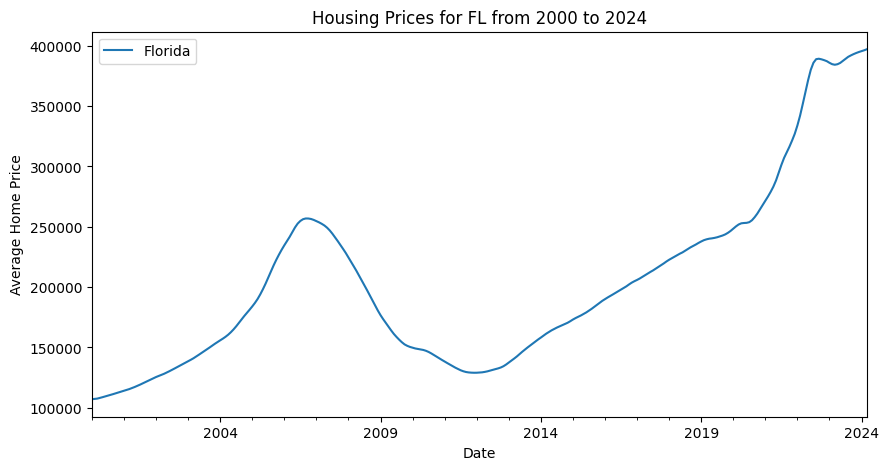

In [17]:
data.set_index('Date', inplace=True)
data.plot(figsize=(10,5))
plt.ylabel('Average Home Price')
plt.title("Housing Prices for FL from 2000 to 2024")

## SPLITTING DATA

In [18]:
prices = data[['Florida']]
split_size = int(0.8* len(prices))
X_train, y_train = prices.index[:split_size], prices.iloc[:split_size]
X_test, y_test = prices.index[split_size:], prices.iloc[split_size:]

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(232, 59, 232, 59)

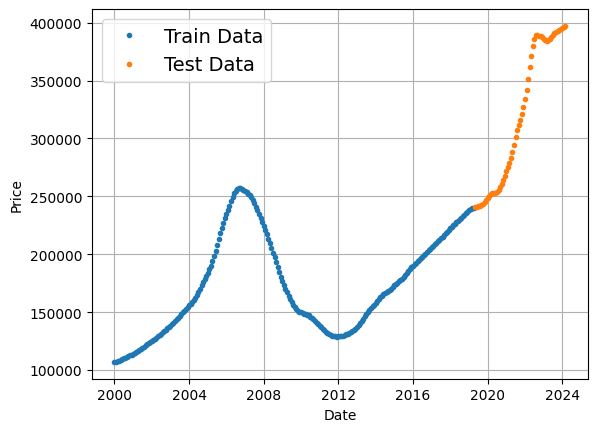

In [20]:
ts_plot(timesteps=X_train, values =y_train, label='Train Data')
ts_plot(timesteps=X_test, values=y_test, label='Test Data')

# NAIVE MODEL

In [21]:
n_forecast = y_test[:-1]
n_forecast[:10],n_forecast[-10:]

(                  Florida
 Date                     
 2019-05-01  240383.987401
 2019-06-01  240789.160670
 2019-07-01  241313.055653
 2019-08-01  242027.538896
 2019-09-01  242737.822182
 2019-10-01  243679.074253
 2019-11-01  244966.488970
 2019-12-01  246553.121018
 2020-01-01  248475.389561
 2020-02-01  250286.419047,
                   Florida
 Date                     
 2023-05-01  385769.552090
 2023-06-01  387444.570719
 2023-07-01  389148.023383
 2023-08-01  390836.127212
 2023-09-01  392010.105986
 2023-10-01  393073.815926
 2023-11-01  394006.460885
 2023-12-01  394838.823983
 2024-01-01  395544.813548
 2024-02-01  396272.856940)

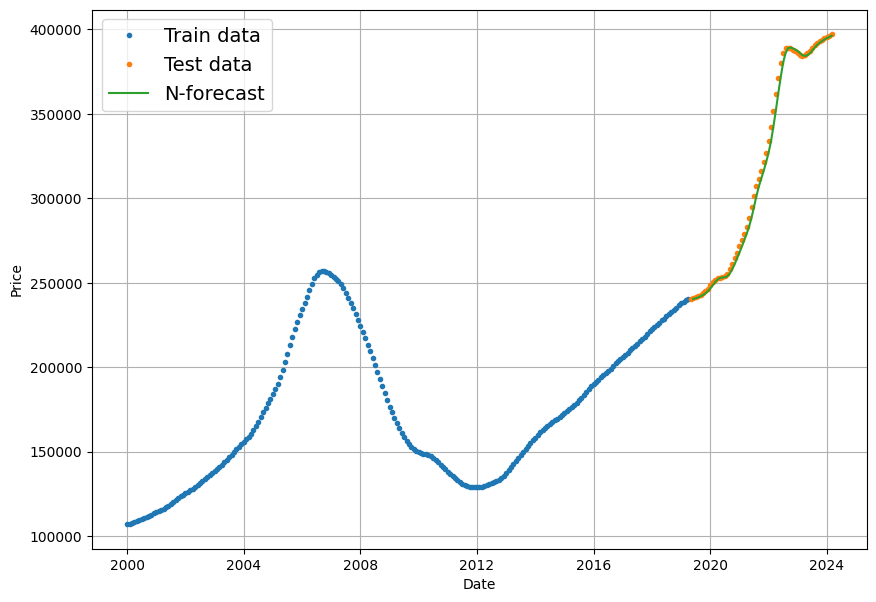

In [22]:
plt.figure(figsize=(10, 7))
ts_plot(timesteps=X_train, values=y_train, label="Train data")
ts_plot(timesteps=X_test, values=y_test, label="Test data")
ts_plot(timesteps=X_test[1:], values=n_forecast, format="-", label="N-forecast");

In [23]:
n_forcast_results = eval_pred(y_true = y_test[1:],
                              y_pred = n_forecast)
n_forcast_results

{'mae': 2874.5833,
 'mse': 15542009.0,
 'rmse': 3942.3354,
 'mape': 0.9027841,
 'mase': 0.9851527}

#RNN

In [69]:
def create_sequences(input_data, window_size):
    X = []
    y = []
    for i in range(len(input_data) - window_size):
        X.append(input_data.iloc[i:(i + window_size)].values)
        y.append(input_data.iloc[i + window_size])
    return np.array(X), np.array(y)

window_size = 12
X_train_seq, y_train_seq = create_sequences(y_train, window_size)
X_test_seq, y_test_seq = create_sequences(y_test, window_size)


In [115]:
def build_rnn_model(input_shape):
    model = tf.keras.Sequential([
        layers.LSTM(128, activation='relu', input_shape=input_shape, return_sequences=True),
        layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
        layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
        layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
        layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=False),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn_model((window_size, 1))


In [105]:
rnn_model.fit(X_train_seq, y_train_seq, epochs=1000, verbose = 0, validation_data=(X_test_seq, y_test_seq))


In [106]:
y_pred_seq = rnn_model.predict(X_test_seq)
results = eval_pred(y_test_seq, y_pred_seq)
print("RNN model performance:", results)

2/2 [==============================] - 1s 13ms/step
RNN model performance: {'mae': 26898.213, 'mse': 1243090800.0, 'rmse': 35257.492, 'mape': 7.896217, 'mase': 8.034659}


2/2 [==============================] - 0s 12ms/step


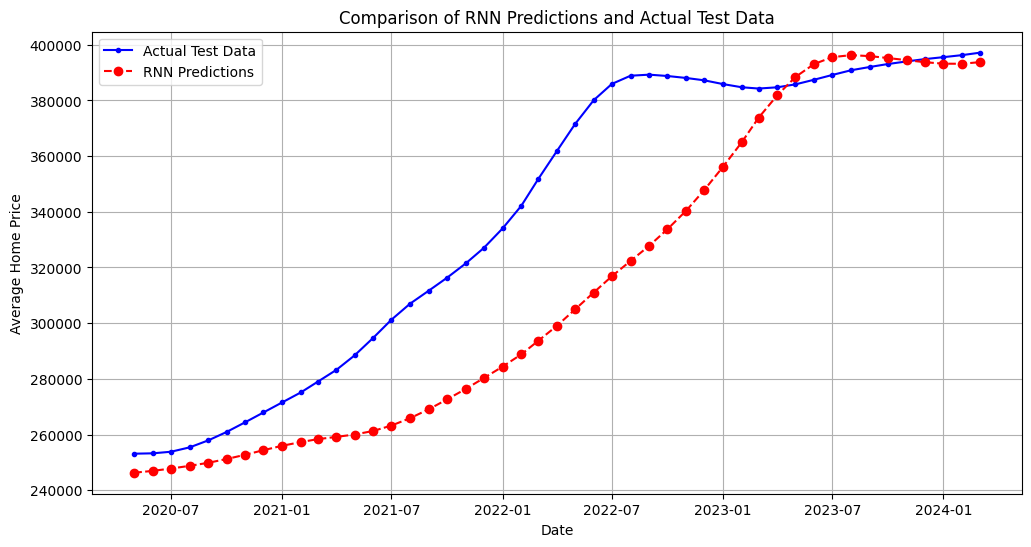

In [107]:

y_pred_rnn = rnn_model.predict(X_test_seq)

test_dates_corrected = X_test[window_size:]

plt.figure(figsize=(12, 6))
plt.plot(test_dates_corrected, y_test_seq, label='Actual Test Data', marker='.', linestyle='-', color='blue')
plt.plot(test_dates_corrected, y_pred_rnn, label='RNN Predictions', marker='o', linestyle='--', color='red')
plt.title('Comparison of RNN Predictions and Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Average Home Price')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
print("Naive Forecast Evaluation:")
print(n_forcast_results)
print("\nRNN Model Evaluation:")
print(results)


Naive Forecast Evaluation:
{'mae': 2874.5833, 'mse': 15542009.0, 'rmse': 3942.3354, 'mape': 0.9027841, 'mase': 0.9851527}

RNN Model Evaluation:
{'mae': 26898.213, 'mse': 1243090800.0, 'rmse': 35257.492, 'mape': 7.896217, 'mase': 8.034659}
